# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [31]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []
countries = []
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [32]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/3.0/onecall?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Get parameters for the API request
    params = {"lat": lats[i],
    "lon": lngs[i],
    # exclude: [current,minutely,hourly,alerts],
     "appid": weather_api_key
    }
    # Create endpoint URL with each city
    city_url = requests.get(url, params=params).url
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    try:
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["lat"]
        city_lng = city_weather["lon"]
        # Find max temp for all possible days
        max = -float("inf")
        for day in city_weather['daily']:
            temp = day['temp']["max"]
            if temp > max: 
                max = temp
                city_max_temp = max - 273.15

        city_humidity = city_weather["current"]["humidity"]
        city_clouds = city_weather["current"]["clouds"]
        city_wind = city_weather["current"]["wind_speed"]
        city_country = citipy.nearest_city(lats[i], lngs[i]).country_code
        city_date = city_weather['current']["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

        # If an error is experienced, skip the city
    except:
        print(f"{city} not found. Skipping...")
        pass
    
 
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port blair
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | ilula
Processing Record 7 of Set 1 | udachny
Processing Record 8 of Set 1 | del rio
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | olonkinbyen
Processing Record 11 of Set 1 | paraty
Processing Record 12 of Set 1 | lompoc
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | labytnangi
Processing Record 15 of Set 1 | madzhalis
Processing Record 16 of Set 1 | hoxtolgay
Processing Record 17 of Set 1 | faya-largeau
Processing Record 18 of Set 1 | bambari
Processing Record 19 of Set 1 | salekhard
Processing Record 20 of Set 1 | idri
Processing Record 21 of Set 1 | lihue
Processing Record 22 of Set 1 | weno
Processing Record 23 

In [33]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)  

# Show Record Count
city_data_df.count()


City          600
Lat           600
Lng           600
Max Temp      600
Humidity      600
Cloudiness    600
Wind Speed    600
Country       600
Date          600
dtype: int64

In [34]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port blair,11.5154,95.4723,28.53,82,100,7.62,in,1686868797
1,papatowai,-63.8062,170.9551,2.28,90,100,7.96,nz,1686868798
2,edinburgh of the seven seas,-68.6152,4.6462,-9.95,100,77,2.34,sh,1686868799
3,waitangi,-64.9264,-150.7886,0.54,94,100,8.99,nz,1686868800
4,grytviken,-60.4278,174.2745,5.56,73,100,6.29,nz,1686868800


In [35]:
# r the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [36]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port blair,11.5154,95.4723,28.53,82,100,7.62,in,1686868797
1,papatowai,-63.8062,170.9551,2.28,90,100,7.96,nz,1686868798
2,edinburgh of the seven seas,-68.6152,4.6462,-9.95,100,77,2.34,sh,1686868799
3,waitangi,-64.9264,-150.7886,0.54,94,100,8.99,nz,1686868800
4,grytviken,-60.4278,174.2745,5.56,73,100,6.29,nz,1686868800


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

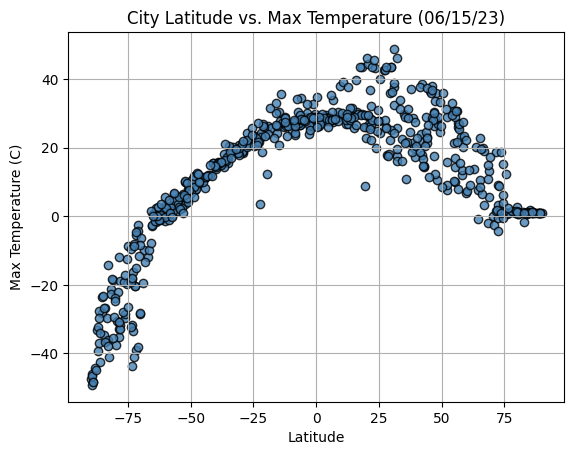

In [37]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor="steelblue", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%x')})")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

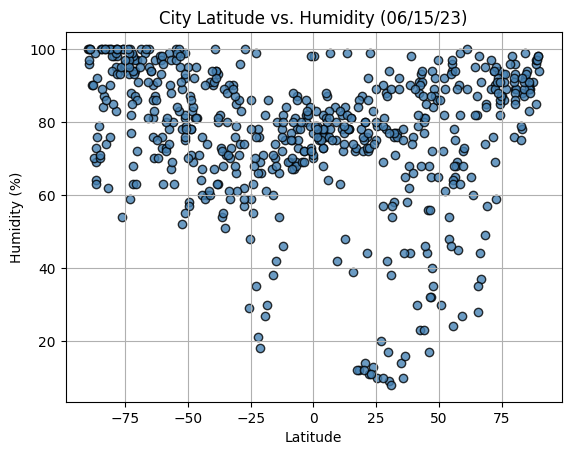

In [38]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor="steelblue", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({time.strftime('%x')})")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

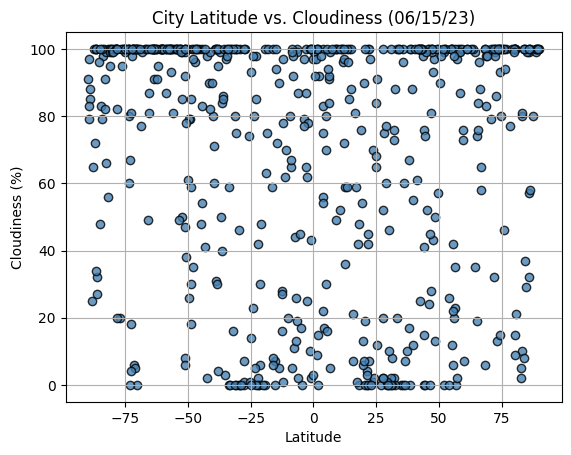

In [39]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor="steelblue", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%x')})")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

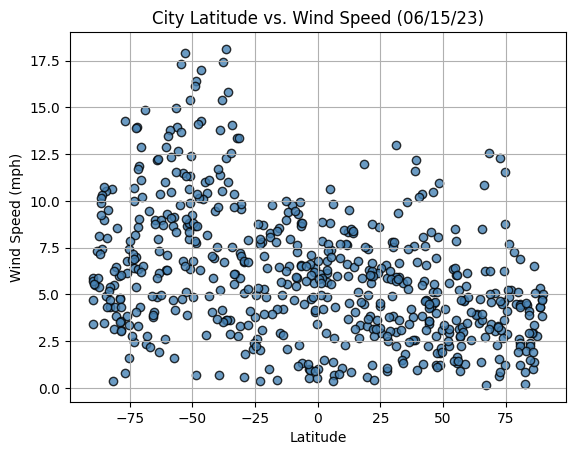

In [40]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor="steelblue", edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%x')})")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [41]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, xlab, ylab, title):
    # Create a function to create perform linear regression on the weather data
    # and plot a regression line and the equation with the data.
    # Define the x and y values
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    regresssion_line = slope * x_values + intercept
    
    # Create the plots
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regresssion_line, "r")

    # Labels
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)

    
    # Add equation annotation
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(0.05, 0.9, equation, transform=plt.gca().transAxes, fontsize=12, color='red')
    plt.show()
    
    # Print the r-squared value along with the plot.
    print(f"The r-value is: {r_value**2}")

In [42]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port blair,11.5154,95.4723,28.53,82,100,7.62,in,1686868797
7,del rio,89.4460,105.6996,0.96,98,100,4.75,ru,1686868803
8,yellowknife,29.9688,-101.1775,43.61,9,0,3.83,us,1686868804
9,olonkinbyen,72.4384,-117.8199,9.20,69,99,0.63,ca,1686868805
10,paraty,86.0066,-4.4496,0.97,90,99,2.96,sj,1686868806


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,papatowai,-63.8062,170.9551,2.28,90,100,7.96,nz,1686868798
2,edinburgh of the seven seas,-68.6152,4.6462,-9.95,100,77,2.34,sh,1686868799
3,waitangi,-64.9264,-150.7886,0.54,94,100,8.99,nz,1686868800
4,grytviken,-60.4278,174.2745,5.56,73,100,6.29,nz,1686868800
5,ilula,-44.2193,-30.4110,11.27,67,100,10.42,gs,1686868801


###  Temperature vs. Latitude Linear Regression Plot

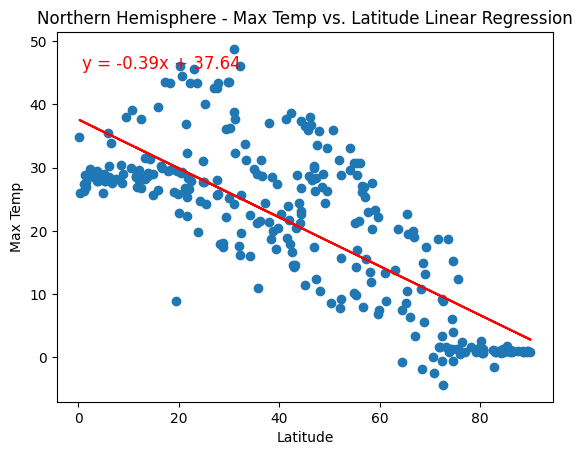

The r-value is: 0.6009627068184483


In [44]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp", "Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

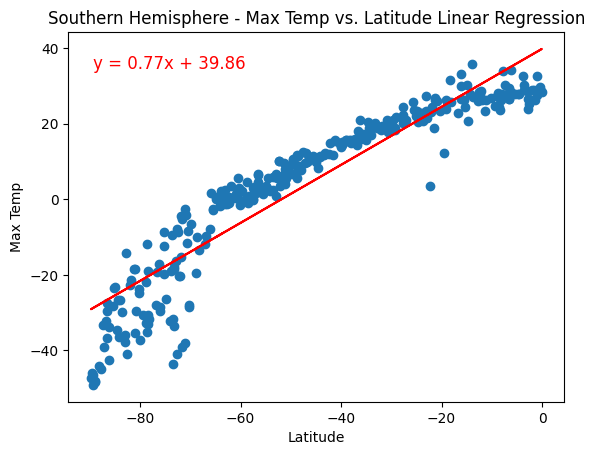

The r-value is: 0.8589944261192487


In [45]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp", "Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

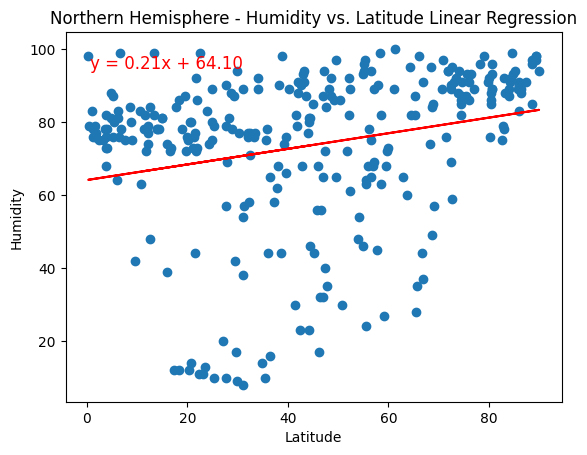

The r-value is: 0.06170390035065183


In [46]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", "Northern Hemisphere - Humidity vs. Latitude Linear Regression")

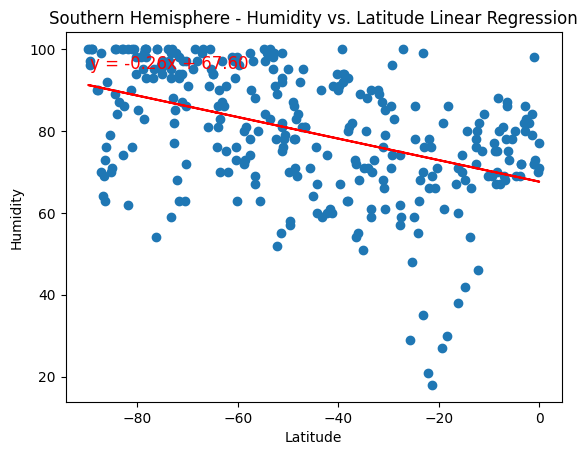

The r-value is: 0.19721968325258318


In [47]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", "Southern Hemisphere - Humidity vs. Latitude Linear Regression")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

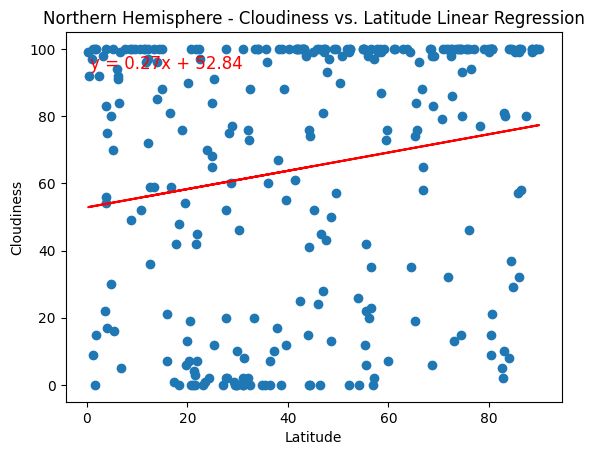

The r-value is: 0.03311202158738053


In [48]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

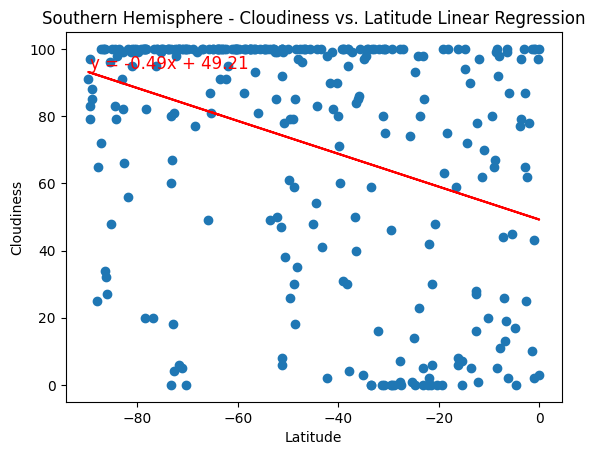

The r-value is: 0.1254551329852433


In [49]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

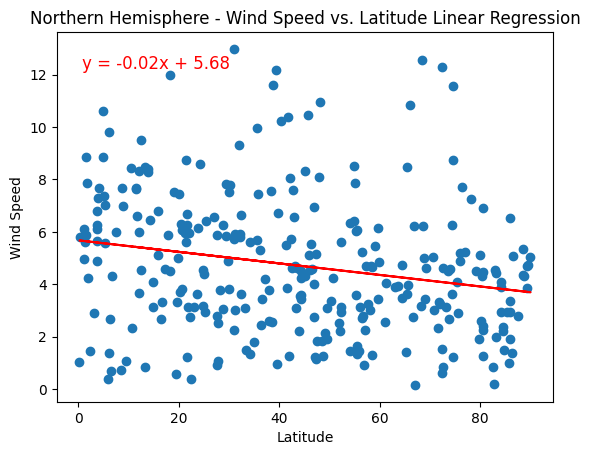

The r-value is: 0.04757937826399023


In [50]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

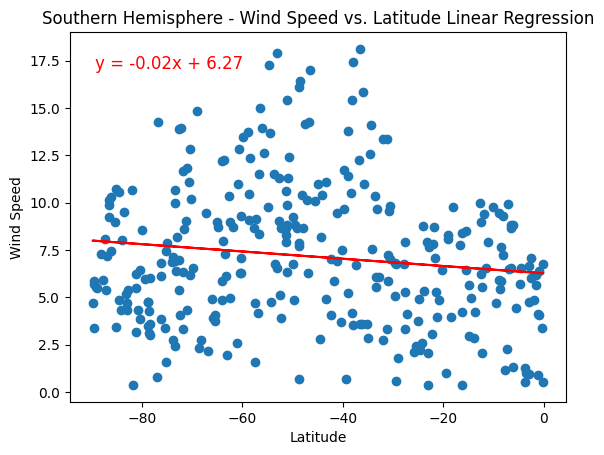

The r-value is: 0.018210999712166106


In [51]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

**Discussion about the linear relationship:** YOUR RESPONSE HERE